In [ ]:
%%capture
!sudo apt install libgsl-dev
!pip install rpy2==3.5.1
%reload_ext rpy2.ipython

In [ ]:
%%R
install.packages("abn", dependencies=TRUE)

In [ ]:
#change download path to your tmp folder it is printed above
!cp /tmp/RtmpL7QpP8/downloaded_packages/* /usr/lib/R/site-library/

In [ ]:
%%R
library(abn)


**Coding exercise related to antimicrobial resistance**

The data set amr.csv has been slightly modified and originate from this paper (*Hartnack S, Odoch T, Kratzer G, Furrer R, Wasteson Y, L’Abée-Lund TM, Skjerve E. Additive Bayesian networks for antimicrobial resistance and potential risk factors in non-typhoidal Salmonella isolates from layer hens in Uganda. BMC Vet Res. 2019 Jun 24;15(1):212. doi: 10.1186/s12917-019-1965-y*).

The data set amr.csv comprises data on antimicrobial resistance against the following seven different antibiotics: ampicillin (Amp_res), chloramphenicol (Clr_res), ciprofloxacin (Cip_res), sulfamethoxazole/trimethoprim (SxT_res), sulfonamide (Sulfa_res), tetracycline (Tet_res), and trimethoprim (Trim_res), were included as binary variables (baseline no resistance).

Furthermore five potential risk factors are included: (Pets) presence 1 or absence 0 (baseline) of pets on the farm, (Gender) of the manager being male 1 (baseline) or 0 female, (Biosecurity) having implemented biosecurity measures 1 or not 0 (baseline), (Handwash) before having contact with birds 1 or not 0 (baseline), (Eggtrays) are re-used 1 or not 0 (baseline).

The research question is to a) determine which of the five risk factors is potentially associated with antimicrobial resistance and b) which of the seven antimicrobial resistances are linked to each other.


**Please use additive Bayesian network modeling with the R package abn to answer the research question.**

Further information related to the coding is available on these websites https://gilleskratzer.github.io/ABN-UseR-2021/ (some code is taken from here) or http://r-bayesian-networks.org/.
To answer the research questions, please provide a pdf file providing code, graphs and text.

Please consider the following points (1 to 4) to be addressed:


# *1*.	Import the data set **amr.csv**

In [ ]:
# here we are cloning our course github repo as it contains data (arm.csv) for today.
# Note: storing data on git is not best practive deu to the size data sets can take. However, the file we work with today is rather small.
!git clone https://github.com/DSIminor/Machine-Learning-An-Interdisciplinary-Introduction.git

Cloning into 'Machine-Learning-An-Interdisciplinary-Introduction'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 320 (delta 50), reused 69 (delta 37), pack-reused 230
Receiving objects: 100% (320/320), 4.21 MiB | 22.43 MiB/s, done.
Resolving deltas: 100% (152/152), done.


In [ ]:
%%R
#now find the data file within the repo, copy paste the path as well  
amr.data <- read.csv('/content/Machine-Learning-An-Interdisciplinary-Introduction/Lecture 10 Antibiotics resistances with Bayesian networks/amr.csv', #set path in ''
                     sep = ";", #set seperator
                     header = #set header
                     )


# 2.	Do descriptive statistics (numerically and graphically) 
Hint: Variables need to be saved as factors.

In [ ]:
%%R
str(amr.data)

'data.frame':	86 obs. of  12 variables:
 $ Pets       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Gender     : int  1 1 1 1 1 1 1 1 2 2 ...
 $ Biosecurity: int  0 0 0 1 1 1 1 1 1 1 ...
 $ Handwash   : int  0 0 0 0 0 0 1 1 1 1 ...
 $ Eggtrays   : int  1 1 1 1 0 0 0 0 1 1 ...
 $ Sulfa_res  : int  1 0 0 0 1 0 1 1 1 1 ...
 $ Cip_res    : int  1 0 0 0 1 1 0 1 1 1 ...
 $ Tet_res    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Trim_res   : int  0 0 0 0 0 0 1 0 0 0 ...
 $ SxT_res    : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Clr_res    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Amp_res    : int  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
%%R
amr.data[c(1:12)] <- lapply(amr.data[c(1:12)], factor)
summary(amr.data)

 Pets   Gender Biosecurity Handwash Eggtrays Sulfa_res Cip_res Tet_res Trim_res
 0:29   1:59   0:53        0:49     0:33     0:65      0:46    0:73    0:80    
 1:57   2:27   1:33        1:37     1:53     1:21      1:40    1:13    1: 6    
 SxT_res Clr_res Amp_res
 0:80    0:82    0:82   
 1: 6    1: 4    1: 4   


## Antibiotic Resistance

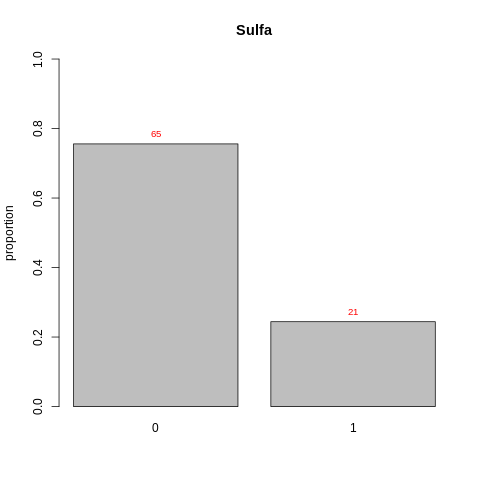

In [ ]:
%%R
barplot(table(amr.data$Sulfa_res)/86, ylim=c(0,1), 
              main="Sulfa", ylab="proportion")
text(x = xx, y = table(amr.data$Sulfa_res)/86, 
     label = table(amr.data$Sulfa_res), pos = 3, cex = 0.8, col = "red")

We see the barplot for the variable Sulfa above please recreate the same plot for the variables Trim, SxT_res, Clr_res, Amp_res utilise one cell for each plot

## Potential risk factors

In [2]:
%%R
xx <- barplot(table(amr.data$Pets)/86, ylim=c(0,1), 
              main="Pets", ylab="proportion")
text(x = xx, y = table(amr.data$Pets)/86, 
     label = table(amr.data$Pets), pos = 3, cex = 0.8, col = "red")


UsageError: Cell magic `%%R` not found.


We see the barplot for the variable Sulfa above please recreate the same plot for the variables Gender, Biosecurity, Handwash, Eggtrays utilise one cell for each plot

# 3. Install and load the R package **abn**

In [ ]:
%%R
library(abn)

# 4.	Determine the optimal dag.

## 4.a Set up the distribution list for each variable
Hint: each variable has a binominal distribution

In [ ]:
%%R
dist <- dist <- list(Pets        = "binomial", 
                     ####YOUR CODE HERE####
                    )


## 4.b Ban and/or retain arcs (optional). We decide to ban the gender arc

In [ ]:
%%R
retain <- matrix(0, ncol(amr.data), ncol(amr.data))
colnames(retain) <- rownames(retain) <- names(amr.data)

banned <- matrix(0, ncol(amr.data), ncol(amr.data))
colnames(banned) <- rownames(banned) <- names(amr.data)

banned[2,-2] <- 1

## 4.c Find the optimal dag by increasing the number of parents from 1 to 9. This involves using the commands *buildScoreCache*, *mostProbable* and *fitAbn*. What is the optimal number of parents (i.e. the highest marginal likelihood values)? 

Please change max.par <- 2 up to max.par <- 9 you can write a for loop or copy the cell 9 times

In [ ]:
%%R
max.par <- 1 

mycache1 <- buildScoreCache(data.df = as.data.frame(amr.data), data.dists = dist, 
                           dag.banned = banned, dag.retained = retain, 
                           max.parents = max.par, method = 'bayes')

mydag1 <- mostProbable(score.cache = mycache1)

In [ ]:
%%R
fabn1 <- fitAbn(object = mydag1)
fabn1$mlik

[1] -488.9781


now fit each of the directed directed acyclic graph, we showed you how one can fit the first dag above

In [ ]:
%%R

mliks <- c(fabn1$mlik, fabn2$mlik, fabn3$mlik,
           fabn4$mlik, fabn5$mlik, fabn6$mlik,
           fabn7$mlik, fabn8$mlik, fabn9$mlik)

parents <- c(1:9)

In [ ]:
%%R
plot(parents, mliks, xlab = "Parent limit", ylab = "Log marginal likelihood", 
     type = "b", col="red", ylim=range(mliks))
abline(v=which(mliks==max(mliks))[1], col="grey", lty=2)

## 4.d Please describe in your own words the commands *buildScoreCache*, *mostProbable* and *fitAbn*.
Hint: you can check the documentation of the package here: https://www.rdocumentation.org/packages/abn/versions/0.83

## 4.e Please plot the optimal dag.
Hint: utilise the function plotAbn()

In [ ]:
%%R


## 4.f Please describe in words the optimal dag, i.e. which risk factors are associated with which antimicrobial resistance and which antimicrobial resistances are linked to each other.

BONUS: Are you able to extract effect sizes?

In [ ]:
%%R
# results are on the log odds scale
marg.f <- fitAbn(object = mydag1, data.df = as.data.frame(amr.data),
                 data.dists = dist, compute.fixed=TRUE, n.grid=1000)

marg.f


BONUS: Could you visually inspect the marginal posterior distributions of the parameters?

In [ ]:
%%R
# results are on the log odds scale
marg.f <- fitAbn(object = mydag3, data.df = as.data.frame(amr.data),
                 data.dists = dist, compute.fixed=TRUE, n.grid=1000)

marg.f

BONUS: How could the robustness of the optimal dag be assessed?

In [ ]:
%%R
par(mfrow=c(1,4), mar=c(2,2,1.5,1))
for(i in 1:length(marg.f$marginals)){

# get the marginal for current node, which is a matrix [x, f(x)]
  cur.node <- marg.f$marginals[i]
  nom1 <- names(marg.f$marginals)[i]

# pick the first value (for models wothout random effects)
  cur.node <- cur.node[[1]]
  for(j in 1:length(cur.node) ) {
    nom2<-names(cur.node)[j]
    cur.param <- cur.node[[j]]
    plot(cur.param,type="l",main=paste(nom1, ":", nom2), cex=0.7)
  }
}